<div style="text-align: right">INFO 6105 - Data Science Eng Methods and Tools</div>
<div style="text-align: right">Take Home Mid-Term</div>
<div style="text-align: right">Vignesh Kumar Baskar [002196442]</div>

## Take Home Mid-Term

**Questions**

*Part 1:*

Do a word Cloud of all of Shakespeare's works (remove stopwords and, optionally, stem and lemmatize). You may use a python library of your choice. 
What's the average number of words per sentence (note: for poems, consider each line to be a separate sentence)? 
What's the average number of words per sentence per type of publication (drama, comedy, history, poem)? 


*Part 2:*

What's the probability that Shakespeare asks a question?
What's the distribution of the number of questions for all his works? 
What's the distribution of the number of questions based on genre (comedies, tragedies, histories, sonnets)? Note that sonnets (poems) don't have many questions, so you may not find any in that genre.
What well known probability distributions could you match each one with? If not possible, how could you simplify the problem (maybe get rid of some outliers?) to answer this question? 


*Part 3:*

Do a sentiment analysis of Shakespeare's sentences and find the sentiment distribution per genre (comedies, tragedies, histories, sonnets). 
You can do that by downloading a library that can classify each sentence into different sentiments. 
I think most sentiment analysis libraries classify in 6 main sentiments, but if you can find a library that distinguishes between more than 6, you are welcome to use that! What kind of model could you match these distributions? Can you find the model's parameters? Are they different based on genre?


*Part 4:*

Do a time series analysis for each genre (i.e. one for drama, one for comedy, etc.) of the 6 main sentiments. 
Smooth out the time series with a method of your choice, to get rid of noise. What can you conclude about sentiment in Shakespeare's works? 
What's your favorite work, and why?


**Importing the required libraries**

In [1]:
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
from PIL import Image
import os

In [2]:
os.getcwd()

'E:\\DAMG\\Data Science Methods and Techniques\\Assignments\\take-home-midterm'

## Part 1: Word Cloud

*Creating a dataframe **df_book** which comprises of all the lines in of the Shakesphere publications and transforming into lower characters.*

In [3]:
df_book = pd.read_fwf("t8.shakespeare.txt", header=None)
df_book.columns = ["lines"]
df_book['lines'] = df_book['lines'].astype(str).str.lower()

In [4]:
df_book.head()

,lines
0,this is the 100th etext file presented by proj...
1,is presented in cooperation with world library...
2,library of the future and shakespeare cdroms. ...
3,often releases etexts that are not placed in t...
4,shakespeare


*Splitting the column data using Tokenizer*

In [5]:
from nltk.tokenize import RegexpTokenizer

reg_exp = RegexpTokenizer('\w+')
df_book['tokens'] = df_book['lines'].apply(reg_exp.tokenize)
df_book.head()

,lines,tokens
0,this is the 100th etext file presented by proj...,"[this, is, the, 100th, etext, file, presented,..."
1,is presented in cooperation with world library...,"[is, presented, in, cooperation, with, world, ..."
2,library of the future and shakespeare cdroms. ...,"[library, of, the, future, and, shakespeare, c..."
3,often releases etexts that are not placed in t...,"[often, releases, etexts, that, are, not, plac..."
4,shakespeare,[shakespeare]


*Reading the **stopwords.txt** file*

In [6]:
df_stopwords = pd.read_fwf("stopwords.txt", header=None)
df_stopwords.columns = ["stopwords"]
df_stopwords.head()

,stopwords
0,i
1,me
2,my
3,myself
4,we


*Removing the Stopwords*

In [7]:
stop_words = list(i for i in df_stopwords["stopwords"])
df_book['tokens'] = df_book['tokens'].apply(lambda x: [item for item in x if item not in stop_words])
df_book.head()

,lines,tokens
0,this is the 100th etext file presented by proj...,"[100th, etext, file, presented, project, guten..."
1,is presented in cooperation with world library...,"[presented, cooperation, world, library, inc]"
2,library of the future and shakespeare cdroms. ...,"[library, future, shakespeare, cdroms, project..."
3,often releases etexts that are not placed in t...,"[often, releases, etexts, placed, public, domain]"
4,shakespeare,[shakespeare]


*Removing the less frequently used words*

In [8]:
df_book['tokens'] = df_book['tokens'].apply(lambda x: ' '.join([item for item in x if len(item) > 2]))
df_book.head()

,lines,tokens
0,this is the 100th etext file presented by proj...,100th etext file presented project gutenberg
1,is presented in cooperation with world library...,presented cooperation world library inc
2,library of the future and shakespeare cdroms. ...,library future shakespeare cdroms project gute...
3,often releases etexts that are not placed in t...,often releases etexts placed public domain
4,shakespeare,shakespeare


*Performing **Lemmatization** to grouping the different inflected forms of a word into a single item*

In [9]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer() 
df_book['tokens'] = df_book['tokens'].apply(wordnet_lem.lemmatize) 
df_book.head()

,lines,tokens
0,this is the 100th etext file presented by proj...,100th etext file presented project gutenberg
1,is presented in cooperation with world library...,presented cooperation world library inc
2,library of the future and shakespeare cdroms. ...,library future shakespeare cdroms project gute...
3,often releases etexts that are not placed in t...,often releases etexts placed public domain
4,shakespeare,shakespeare


**Pre-processing the data**

*Removing the Publications License agreement by finding the index values of the respective lines*

In [10]:
index1 = df_book.index[df_book['lines'] == "<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM".lower()]
index2 = df_book.index[df_book['lines'] == "SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS".lower()]
index3 = df_book.index[df_book['lines'] == "PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE".lower()]
index4 = df_book.index[df_book['lines'] == "WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE".lower()]
index5 = df_book.index[df_book['lines'] == "DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS".lower()]
index6 = df_book.index[df_book['lines'] == "PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED".lower()]
index7 = df_book.index[df_book['lines'] == "COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY".lower()]
index8 = df_book.index[df_book['lines'] == "SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>".lower()]

In [11]:
import itertools
remove_index = list(itertools.chain(index1, index2, index3, index4, index5, index6, index7, index8))
print("Total number of agreement license lines:", len(remove_index))

Total number of agreement license lines: 1760


*Dropping those index from the main dataframe*

In [12]:
df_book.drop(df_book.index[remove_index], inplace=True)
print("The shape of the df_book dataframe:", df_book.shape)

The shape of the df_book dataframe: (113080, 2)


*By analyzing the data, I could able to see that there are two sonnets in the text file.*

*So, I have created two dataframes **df_poem1** and **df_poem2** by finding the index values of the start and end lines of both the poems*

In [13]:
df_book.index[df_book['lines'] == "from fairest creatures we desire increase,"]

Int64Index([197], dtype='int64')

In [14]:
df_book[df_book["lines"].isin(["love's fire heats water, water cools not love."])]

,lines,tokens
2504,"love's fire heats water, water cools not love.",love fire heats water water cools love


In [15]:
df_poem1 = df_book.loc[194:2504]
df_poem1.head()

,lines,tokens
194,the sonnets,sonnet
195,by william shakespeare,william shakespeare
196,1,
197,"from fairest creatures we desire increase,",fairest creatures desire increase
198,"that thereby beauty's rose might never die,",thereby beauty rose might never die


In [16]:
df_poem2 = df_book.loc[114499:114830]
df_poem2.head()

,lines,tokens
114499,a lover's complaint,lover complaint
114500,by william shakespeare,william shakespeare
114501,from off a hill whose concave womb reworded,hill whose concave womb reworded
114502,"a plaintful story from a sist'ring vale,",plaintful story sist ring vale
114503,"my spirits t'attend this double voice accorded,",spirits attend double voice accorded


In [17]:
print("Shape of the df_poem1 dataframe:",df_poem1.shape)
print("Shape of the df_poem2 dataframe:",df_poem2.shape)

Shape of the df_poem1 dataframe: (2311, 2)
Shape of the df_poem2 dataframe: (332, 2)


*Joining both the df_poem1 and df_poem2 dataframes into single one names df_book_poem*

In [18]:
df_book_poem = pd.concat([df_poem1, df_poem2])
print("Shape of the df_book_poem dataframe:",df_book_poem.shape)

Shape of the df_book_poem dataframe: (2643, 2)


*Replacing the empty rows with the not a number values*

In [19]:
df_book_poem['tokens'].replace('', np.nan, inplace=True)
df_book_poem.dropna(subset=['tokens'], inplace=True)
df_book_poem.head()

,lines,tokens
194,the sonnets,sonnet
195,by william shakespeare,william shakespeare
197,"from fairest creatures we desire increase,",fairest creatures desire increase
198,"that thereby beauty's rose might never die,",thereby beauty rose might never die
199,"but as the riper should by time decease,",riper time decease


**Created a new Excel file which contains all the Shakesphere play titles along with its category**

*Reading the file as a pandas dataframe and using it for segregatting titles based on the genres*

In [20]:
df_book_category = pd.read_excel("books_category.xlsx")
df_book_category.title = df_book_category['title'].astype(str).str.lower()
df_book_category

,title,category
0,alls well that ends well,comedies
1,the tragedy of antony and cleopatra,tragedies
2,as you like it,comedies
3,the comedy of errors,comedies
4,the tragedy of coriolanus,tragedies
5,cymbeline,comedies
6,"the tragedy of hamlet, prince of denmark",tragedies
7,the first part of king henry the fourth,histories
8,second part of king henry iv,histories
9,the life of king henry the fifth,histories


*Finding the index of the string "the end" in order to get the ending point of the drama.*

*I have found that, at one instance "-the end-" word has been used which actaully miss-matching the point of the index. So I have replaced it with "the end"*

In [21]:
df_book.index[df_book['lines'] == "-the end-".lower()]

Int64Index([64056], dtype='int64')

In [22]:
df_book.lines.loc[64056] = 'the end'

In [23]:
the_end_index = df_book.index[df_book['lines'] == "the end".lower()]

In [24]:
print("The list of indexes based on the string 'the end':",the_end_index)

The list of indexes based on the string 'the end': Int64Index([  2505,   5509,   9377,  12114,  14084,  18036,  21916,  26160,
             29283,  32616,  35986,  39089,  42454,  45699,  49237,  52073,
             54882,  58562,  61439,  64056,  66972,  69743,  72593,  74883,
             77479,  81158,  84186,  88389,  91720,  94542,  97027,  99659,
            102463, 106146, 108707, 111072, 114489, 114830],
           dtype='int64')


*Removing the first and last index values from the_end_index list since it belongs to the poem category*

In [25]:
the_end_index = the_end_index[1:]
the_end_index = the_end_index[:-1]

print("Length of the 'the_end_index':",len(the_end_index))

Length of the 'the_end_index': 36


*Creating the book_category_index list and adding those matching index values*

*From which I can able to get the starting index*

In [26]:
book_category_index = []

for i in range(len(df_book_category)):
    book_category_index.append(df_book[df_book["lines"] == df_book_category.title[i]].index.values)
                                             
book_category_index                   

[array([2515], dtype=int64),
 array([5519], dtype=int64),
 array([9387], dtype=int64),
 array([12116, 12154], dtype=int64),
 array([14094], dtype=int64),
 array([18046], dtype=int64),
 array([21926], dtype=int64),
 array([26170], dtype=int64),
 array([29293], dtype=int64),
 array([32626], dtype=int64),
 array([35996], dtype=int64),
 array([39099], dtype=int64),
 array([42464], dtype=int64),
 array([45709, 45712, 45743], dtype=int64),
 array([49247, 49250, 49270], dtype=int64),
 array([52083], dtype=int64),
 array([54892], dtype=int64),
 array([58572], dtype=int64),
 array([61449], dtype=int64),
 array([64066], dtype=int64),
 array([66982], dtype=int64),
 array([69753, 69789], dtype=int64),
 array([72603], dtype=int64),
 array([74893], dtype=int64),
 array([77489], dtype=int64),
 array([81168, 81171], dtype=int64),
 array([84196], dtype=int64),
 array([88399], dtype=int64),
 array([91730], dtype=int64),
 array([94552, 94589], dtype=int64),
 array([97037], dtype=int64),
 array([99669], d

*Performing some more preprocessing steps for aligning the index values*

In [27]:
df_book_category["title_index"] = book_category_index
df_book_category["the_end_index"] = the_end_index

In [28]:
df_book_category["title_index"][3] =  [12116]
df_book_category["title_index"][13] = [45709]
df_book_category["title_index"][14] = [49247]
df_book_category["title_index"][21] = [69753]
df_book_category["title_index"][25] = [81168]
df_book_category["title_index"][29] = [94552]

C:\Users\Inspiron\AppData\Local\Temp/ipykernel_21796/4078539211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book_category["title_index"][3] =  [12116]
C:\Users\Inspiron\AppData\Local\Temp/ipykernel_21796/4078539211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book_category["title_index"][13] = [45709]
C:\Users\Inspiron\AppData\Local\Temp/ipykernel_21796/4078539211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [29]:
for i in range(len(df_book_category)):
    df_book_category.title_index[i] = df_book_category.title_index[i][0]

print("Total number of Shakesphere drama plays:", len(df_book_category))
df_book_category

Total number of Shakesphere drama plays: 36


C:\Users\Inspiron\AppData\Local\Temp/ipykernel_21796/3505058341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book_category.title_index[i] = df_book_category.title_index[i][0]


,title,category,title_index,the_end_index
0,alls well that ends well,comedies,2515,5509
1,the tragedy of antony and cleopatra,tragedies,5519,9377
2,as you like it,comedies,9387,12114
3,the comedy of errors,comedies,12116,14084
4,the tragedy of coriolanus,tragedies,14094,18036
5,cymbeline,comedies,18046,21916
6,"the tragedy of hamlet, prince of denmark",tragedies,21926,26160
7,the first part of king henry the fourth,histories,26170,29283
8,second part of king henry iv,histories,29293,32616
9,the life of king henry the fifth,histories,32626,35986


*Creating dataframes for the individual genres such as Comedy, History, and Tragedy*

In [30]:
df_book_category_comedies  = df_book_category[df_book_category["category"]=="comedies"]
df_book_category_tragedies = df_book_category[df_book_category["category"]=="tragedies"]
df_book_category_histories = df_book_category[df_book_category["category"]=="histories"]

In [31]:
df_book_category_comedies

,title,category,title_index,the_end_index
0,alls well that ends well,comedies,2515,5509
2,as you like it,comedies,9387,12114
3,the comedy of errors,comedies,12116,14084
5,cymbeline,comedies,18046,21916
19,measure for measure,comedies,64066,66972
20,the merchant of venice,comedies,66982,69743
21,the merry wives of windsor,comedies,69753,72593
22,a midsummer night's dream,comedies,72603,74883
23,much ado about nothing,comedies,74893,77479
28,the taming of the shrew,comedies,91730,94542


In [32]:
df_book_category_tragedies

,title,category,title_index,the_end_index
1,the tragedy of antony and cleopatra,tragedies,5519,9377
4,the tragedy of coriolanus,tragedies,14094,18036
6,"the tragedy of hamlet, prince of denmark",tragedies,21926,26160
15,the tragedy of julius caesar,tragedies,52083,54882
16,the tragedy of king lear,tragedies,54892,58562
18,the tragedy of macbeth,tragedies,61449,64056
24,"the tragedy of othello, moor of venice",tragedies,77489,81158
27,the tragedy of romeo and juliet,tragedies,88399,91720
30,the life of timon of athens,tragedies,97037,99659
31,the tragedy of titus andronicus,tragedies,99669,102463


In [33]:
df_book_category_histories

,title,category,title_index,the_end_index
7,the first part of king henry the fourth,histories,26170,29283
8,second part of king henry iv,histories,29293,32616
9,the life of king henry the fifth,histories,32626,35986
10,the first part of henry the sixth,histories,35996,39089
11,the second part of king henry the sixth,histories,39099,42454
12,the third part of king henry the sixth,histories,42464,45699
13,king henry the eighth,histories,45709,49237
14,king john,histories,49247,52073
25,king richard the second,histories,81168,84186
26,king richard iii,histories,84196,88389


*Finally appending all the drama lines in their respective genre dataframe*

In [34]:
df_book_comedies = pd.DataFrame([])
df_book_histories = pd.DataFrame([])
df_book_tragedies = pd.DataFrame([])

for i in df_book_category_comedies.index:
    df = df_book.loc[df_book_category_comedies.title_index[i]:df_book_category_comedies.the_end_index[i]+1]
    df_book_comedies = pd.concat([df_book_comedies, df])
    

for i in df_book_category_histories.index:
    df = df_book.loc[df_book_category_histories.title_index[i]:df_book_category_histories.the_end_index[i]+1]
    df_book_histories = pd.concat([df_book_histories, df])
    

for i in df_book_category_tragedies.index:
    df = df_book.loc[df_book_category_tragedies.title_index[i]:df_book_category_tragedies.the_end_index[i]+1]
    df_book_tragedies = pd.concat([df_book_tragedies, df])
    
print("Number of the lines in the Book for the Poem genre:", len(df_book_poem))
print("Number of the lines in the Book for the Comedies genre:", len(df_book_comedies))
print("Number of the lines in the Book for the Histories genre:", len(df_book_histories))
print("Number of the lines in the Book for the Tragedies genre:", len(df_book_tragedies))

Number of the lines in the Book for the Poem genre: 2543
Number of the lines in the Book for the Comedies genre: 37995
Number of the lines in the Book for the Histories genre: 36272
Number of the lines in the Book for the Tragedies genre: 33126


In [35]:
print("Total number of lines in the Book before preprocessing the data:", len(df_book))

Total number of lines in the Book before preprocessing the data: 113080


*Creating the df_book_all_publicaions dataframe which comprises of all the Shakesphere genre wordks such as Poem, Comedy, History, and Tragedy*

In [36]:
df_book_all_publications = pd.concat([df_book_poem, df_book_comedies, df_book_tragedies, df_book_histories])
print("Total number of lines in the Book after preprocessing the data:", len(df_book_all_publications))

Total number of lines in the Book after preprocessing the data: 109936


*Re-indexing the df_book_all_publicaions*

In [37]:
# Reindexing
import numpy as np

re_index = np.arange(109936)
df_book_all_publications = df_book_all_publications.set_index(re_index)
df_book_all_publications.head()

,lines,tokens
0,the sonnets,sonnet
1,by william shakespeare,william shakespeare
2,"from fairest creatures we desire increase,",fairest creatures desire increase
3,"that thereby beauty's rose might never die,",thereby beauty rose might never die
4,"but as the riper should by time decease,",riper time decease


In [38]:
book_words = ' '.join([word for word in df_book_all_publications['tokens']])
print("Length of the words in the book for all the publications:",len(book_words))

Length of the words in the book for all the publications: 2874940


**Word Cloud**

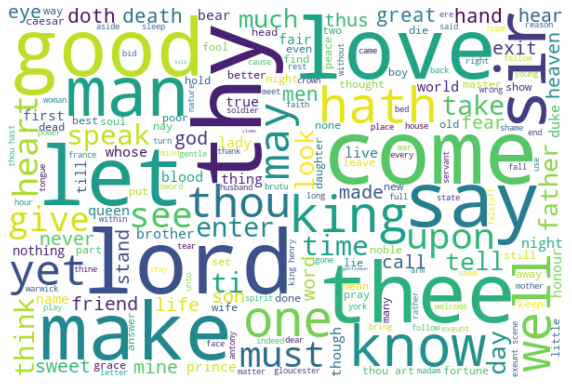

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                      height=400, 
                      background_color = 'white',
                      random_state=2, 
                      max_font_size=100).generate(book_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**Finding Frequency Distributions of the Words**

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(book_words)
fd = FreqDist(words)

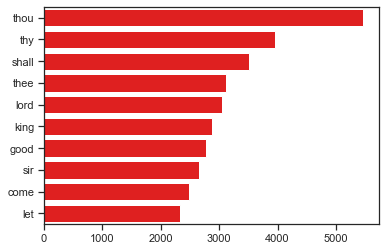

In [41]:
import seaborn as sns

top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='red');

*Calculating the count of words for each lines*

In [42]:
df_book_all_publications['number_of_words'] = df_book_all_publications['tokens'].str.split().map(len)
df_book_all_publications.head()

,lines,tokens,number_of_words
0,the sonnets,sonnet,1
1,by william shakespeare,william shakespeare,2
2,"from fairest creatures we desire increase,",fairest creatures desire increase,4
3,"that thereby beauty's rose might never die,",thereby beauty rose might never die,6
4,"but as the riper should by time decease,",riper time decease,3


*Calculating the Average number of words per sentence*

In [100]:
total = 0

for i in df_book_all_publications.number_of_words:
    total += i
print("Average number of words per sentence for all the Shakesphere publications: ",round(total/len(df_book_all_publications),2))

Average number of words per sentence for all the Shakesphere publications:  4.08


In [44]:
df_book_poem['number_of_words'] = df_book_poem['tokens'].str.split().map(len)
df_book_comedies['number_of_words']  = df_book_comedies['tokens'].str.split().map(len)
df_book_tragedies['number_of_words'] = df_book_tragedies['tokens'].str.split().map(len)
df_book_histories['number_of_words'] = df_book_histories['tokens'].str.split().map(len)

In [45]:
poem_total = 0
history_total = 0
tragedy_total = 0
comedy_total = 0

for i in df_book_poem.number_of_words:
    poem_total += i
print("Average number of words per sentence in the Poem category:",round(poem_total/len(df_book_poem),2))

for i in df_book_comedies.number_of_words:
    comedy_total += i
print("Average number of words per sentence in the Comedies category:",round(comedy_total/len(df_book_comedies),2))

for i in df_book_tragedies.number_of_words:
    tragedy_total += i
print("Average number of words per sentence in the Tragedies category:",round(tragedy_total/len(df_book_tragedies),2))

for i in df_book_histories.number_of_words:
    history_total += i
print("Average number of words per sentence in the Histories category:",round(history_total/len(df_book_histories),2))

Average number of words per sentence in the Poem category: 4.35
Average number of words per sentence in the Comedies category: 4.07
Average number of words per sentence in the Tragedies category: 3.94
Average number of words per sentence in the Histories category: 4.21


## Part 2: Probability Distribution

**Probability that Shakespeare asks a question**

*Initially, I have calculated the occurances of the character "?" in each sentences for all of his publications*

In [46]:
questions_all_publications = df_book_all_publications[df_book_all_publications["lines"].str.contains("\?")]
print("Total number of questions raised by Shakesphere in all of his publications:", len(questions_all_publications))
prob_questions_all_publications = round(len(questions_all_publications)/len(df_book_all_publications),2)
print("Probability of Shakesphere asks a question in the all his publications:",prob_questions_all_publications)

Total number of questions raised by Shakesphere in all of his publications: 9434
Probability of Shakesphere asks a question in the all his publications: 0.09


*It was likely to be around 9%. So the probability that Shakesphere asks a question in all his publications is 0.09*

**For Comedies Genre**

In [47]:
questions_comedies = df_book_comedies[df_book_comedies["lines"].str.contains("\?")]
print("Total number of questions raised by Shakesphere in the Comedy genre:", len(questions_comedies))
prob_questions_comedies = round(len(questions_comedies)/len(df_book_comedies),2)
print("Probability of Shakesphere asks a question in the Comedy genre:",prob_questions_comedies)

Total number of questions raised by Shakesphere in the Comedy genre: 3410
Probability of Shakesphere asks a question in the Comedy genre: 0.09


*The probability that Shakesphere asks a question for his **Comedy genre** is 0.09*

**For Histories Genre**

In [48]:
questions_histories = df_book_histories[df_book_histories["lines"].str.contains("\?")]
print("Total number of questions raised by Shakesphere in the History genre:", len(questions_histories))
prob_questions_histories = round(len(questions_histories)/len(df_book_histories),2)
print("Probability of Shakesphere asks a question in the History genre:",prob_questions_histories)

Total number of questions raised by Shakesphere in the History genre: 2868
Probability of Shakesphere asks a question in the History genre: 0.08


*The probability that Shakesphere asks a question for his **History genre** is 0.08*

**For Tragedies Genre**

In [49]:
questions_tragedies = df_book_tragedies[df_book_tragedies["lines"].str.contains("\?")]
print("Total number of questions raised by Shakesphere in the Tragedy genre:", len(questions_tragedies))
prob_questions_tragedies = round(len(questions_tragedies)/len(df_book_tragedies),2)
print("Probability of Shakesphere asks a question in the History genre:",prob_questions_tragedies)

Total number of questions raised by Shakesphere in the Tragedy genre: 3058
Probability of Shakesphere asks a question in the History genre: 0.09


*The probability that Shakesphere asks a question for his **Tragedy genre** is 0.09*

**For Poem Genre**

*For sonnets, there are less chances of possibilities that Shakesphere can throw a question.*

In [50]:
questions_poem = df_book_poem[df_book_poem["lines"].str.contains("\?")]
print("Total number of questions raised by Shakesphere in the Tragedy genre:", len(questions_poem))
prob_questions_poem = round(len(questions_poem)/len(df_book_poem),2)
print("Probability of Shakesphere asks a question in the Poem genre:",prob_questions_poem)

Total number of questions raised by Shakesphere in the Tragedy genre: 98
Probability of Shakesphere asks a question in the Poem genre: 0.04


*The probability that Shakesphere asks a question for his **Poems** is 0.04*

**Probability Distribution**

*Finding the distribution of number of questions based on each of his genre*

*Neglecting the poems since there is less probability that Shakesphere can asks a question*

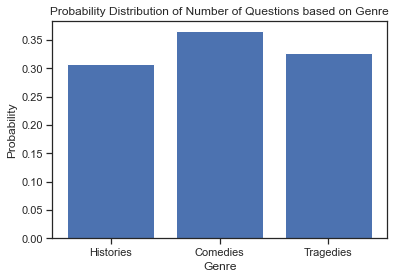

In [51]:
no_of_questions = np.array([len(questions_histories), len(questions_comedies), len(questions_tragedies)])
prob = np.array([i/no_of_questions.sum() for i in no_of_questions])
genre = ["Histories", "Comedies","Tragedies"]
plt.bar(genre, prob)
plt.xlabel("Genre")
plt.ylabel("Probability")
plt.title("Probability Distribution of Number of Questions based on Genre")
plt.show();


*Based on the above plot, can able to find that it looks like a **Gaussian(Normal) Distribution** model.*

*Whereas in the other aspect, the probability of Shakesphere asks the questions in the different genre seems to be more uniform.*

*Since the probability of asking questions lies on the same values, the distribution looks like a uniform model.*

## Part 3: Sentimental Analysis

In [54]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

*Adding the new 'polarity' column for finding the polarity scores using the SentimentIntensityAnalyzer()*

In [55]:
df_book_all_publications['polarity'] = df_book_all_publications['tokens'].apply(lambda x: analyzer.polarity_scores(x))
df_book_all_publications.head()

,lines,tokens,number_of_words,polarity
0,the sonnets,sonnet,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,by william shakespeare,william shakespeare,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"from fairest creatures we desire increase,",fairest creatures desire increase,4,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."
3,"that thereby beauty's rose might never die,",thereby beauty rose might never die,6,"{'neg': 0.0, 'neu': 0.365, 'pos': 0.635, 'comp..."
4,"but as the riper should by time decease,",riper time decease,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [56]:
df_book_all_publications = pd.concat( [df_book_all_publications.drop(['polarity'], axis=1), 
                                       df_book_all_publications['polarity'].apply(pd.Series)], axis=1)
df_book_all_publications.head()

,lines,tokens,number_of_words,neg,neu,pos,compound
0,the sonnets,sonnet,1,0.0,1.000,0.000,0.0000
1,by william shakespeare,william shakespeare,2,0.0,1.000,0.000,0.0000
2,"from fairest creatures we desire increase,",fairest creatures desire increase,4,0.0,0.286,0.714,0.6124
3,"that thereby beauty's rose might never die,",thereby beauty rose might never die,6,0.0,0.365,0.635,0.7873
4,"but as the riper should by time decease,",riper time decease,3,0.0,1.000,0.000,0.0000


In [57]:
df_book_all_publications['sentiment'] = df_book_all_publications['compound'].apply(lambda x: 'positive' if x>0 else 'neutral' if x==0 else 'negative')
df_book_all_publications.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
0,the sonnets,sonnet,1,0.0,1.000,0.000,0.0000,neutral
1,by william shakespeare,william shakespeare,2,0.0,1.000,0.000,0.0000,neutral
2,"from fairest creatures we desire increase,",fairest creatures desire increase,4,0.0,0.286,0.714,0.6124,positive
3,"that thereby beauty's rose might never die,",thereby beauty rose might never die,6,0.0,0.365,0.635,0.7873,positive
4,"but as the riper should by time decease,",riper time decease,3,0.0,1.000,0.000,0.0000,neutral


**Ploting the sentiment analysis count for All the Book Publications**

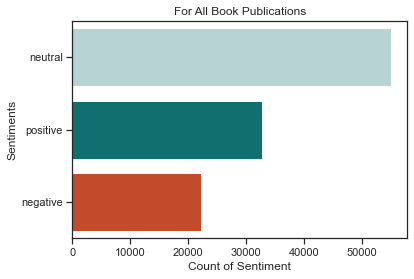

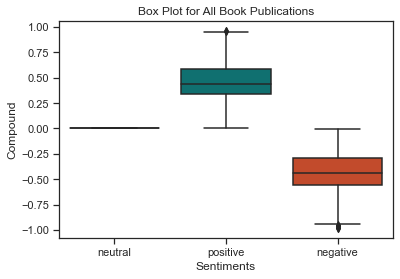

In [59]:
import seaborn as sns

fig1 = sns.countplot(y='sentiment', data = df_book_all_publications, palette=['#b2d8d8',"#008080", '#db3d13'])
fig1.set(xlabel='Count of Sentiment', ylabel='Sentiments', title='For All Book Publications')
plt.show();

fig2 = sns.boxplot(y='compound', x='sentiment', palette=['#b2d8d8',"#008080", '#db3d13'], data = df_book_all_publications)
fig2.set(xlabel='Sentiments', ylabel='Compound', title='Box Plot for All Book Publications')
plt.show();

In [60]:
df_book_comedies['polarity'] = df_book_comedies['tokens'].apply(lambda x: analyzer.polarity_scores(x))
df_book_comedies = pd.concat( [df_book_comedies.drop(['polarity'], axis=1), 
                               df_book_comedies['polarity'].apply(pd.Series)], axis=1)
df_book_comedies['sentiment'] = df_book_comedies['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_book_comedies.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
2515,alls well that ends well,alls well ends well,4,0.0,0.323,0.677,0.4939,positive
2516,by william shakespeare,william shakespeare,2,0.0,1.000,0.000,0.0000,neutral
2517,dramatis personae,dramatis personae,2,0.0,1.000,0.000,0.0000,neutral
2518,king of france,king france,2,0.0,1.000,0.000,0.0000,neutral
2519,the duke of florence,duke florence,2,0.0,1.000,0.000,0.0000,neutral


**Ploting the sentiment analysis count for the Book Comedies Genre**

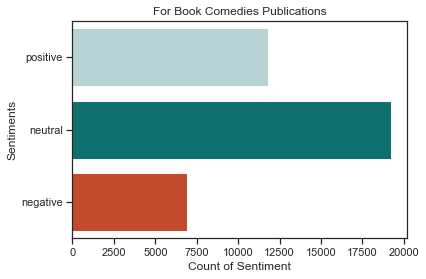

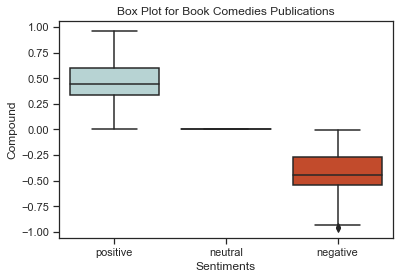

In [61]:
fig1 = sns.countplot(y='sentiment', data = df_book_comedies, palette=['#b2d8d8',"#008080", '#db3d13'])
fig1.set(xlabel='Count of Sentiment', ylabel='Sentiments', title='For Book Comedies Publications')
plt.show();

fig2 = sns.boxplot(y='compound', x='sentiment', palette=['#b2d8d8',"#008080", '#db3d13'], data = df_book_comedies)
fig2.set(xlabel='Sentiments', ylabel='Compound', title='Box Plot for Book Comedies Publications')
plt.show();

In [62]:
df_book_histories['polarity'] = df_book_histories['tokens'].apply(lambda x: analyzer.polarity_scores(x))
df_book_histories = pd.concat( [df_book_histories.drop(['polarity'], axis=1), 
                                df_book_histories['polarity'].apply(pd.Series)], axis=1)
df_book_histories['sentiment'] = df_book_histories['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_book_histories.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
26170,the first part of king henry the fourth,first part king henry fourth,5,0.0,1.0,0.0,0.0,neutral
26171,by william shakespeare,william shakespeare,2,0.0,1.0,0.0,0.0,neutral
26172,dramatis personae,dramatis personae,2,0.0,1.0,0.0,0.0,neutral
26173,king henry the fourth.,king henry fourth,3,0.0,1.0,0.0,0.0,neutral
26174,"henry, prince of wales, son to the king.",henry prince wales son king,5,0.0,1.0,0.0,0.0,neutral


**Ploting the sentiment analysis count for the Book History Genre**

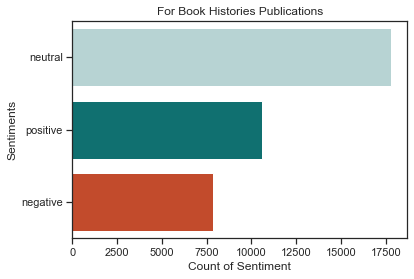

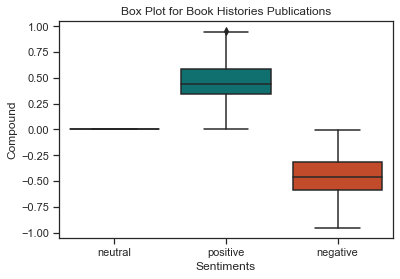

In [63]:
fig1 = sns.countplot(y='sentiment', data = df_book_histories, palette=['#b2d8d8',"#008080", '#db3d13'])
fig1.set(xlabel='Count of Sentiment', ylabel='Sentiments', title='For Book Histories Publications')
plt.show();

fig2 = sns.boxplot(y='compound', x='sentiment', palette=['#b2d8d8',"#008080", '#db3d13'], data = df_book_histories)
fig2.set(xlabel='Sentiments', ylabel='Compound', title='Box Plot for Book Histories Publications')
plt.show();

In [64]:
df_book_tragedies['polarity'] = df_book_tragedies['tokens'].apply(lambda x: analyzer.polarity_scores(x))
df_book_tragedies = pd.concat( [df_book_tragedies.drop(['polarity'], axis=1), 
                                df_book_tragedies['polarity'].apply(pd.Series)], axis=1)
df_book_tragedies['sentiment'] = df_book_tragedies['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_book_tragedies.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
5519,the tragedy of antony and cleopatra,tragedy antony cleopatra,3,0.688,0.312,0.0,-0.6597,negative
5520,by william shakespeare,william shakespeare,2,0.000,1.000,0.0,0.0000,neutral
5521,dramatis personae,dramatis personae,2,0.000,1.000,0.0,0.0000,neutral
5522,"mark antony, triumvirs",mark antony triumvirs,3,0.000,1.000,0.0,0.0000,neutral
5523,"octavius caesar, """,octavius caesar,2,0.000,1.000,0.0,0.0000,neutral


**Ploting the sentiment analysis count for the Book Tragedy Genre**

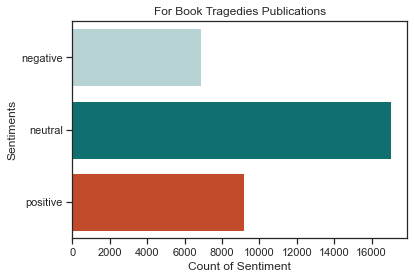

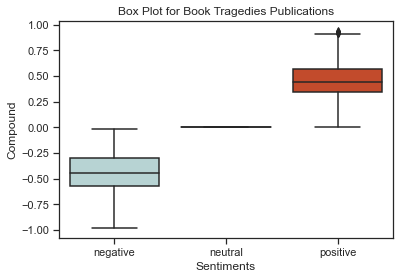

In [65]:
fig1 = sns.countplot(y='sentiment', data = df_book_tragedies, palette=['#b2d8d8',"#008080", '#db3d13'])
fig1.set(xlabel='Count of Sentiment', ylabel='Sentiments', title='For Book Tragedies Publications')
plt.show();

fig2 = sns.boxplot(y='compound', x='sentiment', palette=['#b2d8d8',"#008080", '#db3d13'], data = df_book_tragedies)
fig2.set(xlabel='Sentiments', ylabel='Compound', title='Box Plot for Book Tragedies Publications')
plt.show();

In [68]:
df_book_poem['polarity'] = df_book_poem['tokens'].apply(lambda x: analyzer.polarity_scores(x))
df_book_poem = pd.concat( [df_book_poem.drop(['polarity'], axis=1), 
                                df_book_poem['polarity'].apply(pd.Series)], axis=1)
df_book_poem['sentiment'] = df_book_poem['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_book_poem.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
194,the sonnets,sonnet,1,0.0,1.000,0.000,0.0000,neutral
195,by william shakespeare,william shakespeare,2,0.0,1.000,0.000,0.0000,neutral
197,"from fairest creatures we desire increase,",fairest creatures desire increase,4,0.0,0.286,0.714,0.6124,positive
198,"that thereby beauty's rose might never die,",thereby beauty rose might never die,6,0.0,0.365,0.635,0.7873,positive
199,"but as the riper should by time decease,",riper time decease,3,0.0,1.000,0.000,0.0000,neutral


**Ploting the sentiment analysis count for the Book Poem Genre**

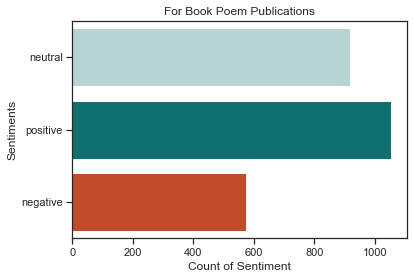

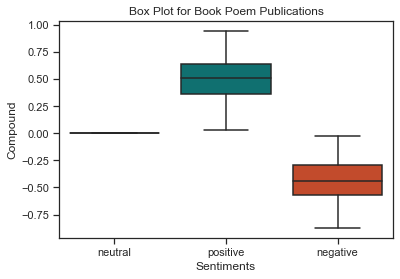

In [97]:
fig1 = sns.countplot(y='sentiment', data = df_book_poem, palette=['#b2d8d8',"#008080", '#db3d13'])
fig1.set(xlabel='Count of Sentiment', ylabel='Sentiments', title='For Book Poem Publications')
plt.show();

fig2 = sns.boxplot(y='compound', x='sentiment', palette=['#b2d8d8',"#008080", '#db3d13'], data = df_book_poem)
fig2.set(xlabel='Sentiments', ylabel='Compound', title='Box Plot for Book Poem Publications')
plt.show();

*After analysing the Sentimental analysis of the Shakesphere different publications, can able to conclude the below findings. 

1. In Sonnets category, Shakesphere had used more postive sentences
2. In Tragedies category, Shakesphere words tends to more neutral sentences followed by positive sentences.
3. In Comedies category, Shakesphere works comprised of positive sentences
4. In History category, Shakesphere had used more neutral sentences

*In overall, Shakesphere had conveyed his drama and sonnets in a non-negative manner.*

## Part 4: Time Series

*Using the **text2emotion** library, finding the emotions for all the Shakesphere genre*

In [70]:
import text2emotion as te

*Starting with the Shakesphere **Tragedies Genre***

In [67]:
df_book_tragedies.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
5519,the tragedy of antony and cleopatra,tragedy antony cleopatra,3,0.688,0.312,0.0,-0.6597,negative
5520,by william shakespeare,william shakespeare,2,0.000,1.000,0.0,0.0000,neutral
5521,dramatis personae,dramatis personae,2,0.000,1.000,0.0,0.0000,neutral
5522,"mark antony, triumvirs",mark antony triumvirs,3,0.000,1.000,0.0,0.0000,neutral
5523,"octavius caesar, """,octavius caesar,2,0.000,1.000,0.0,0.0000,neutral


*Adding all the entire words used in the Tragedies genre into a single variable all_words_tragedies*

In [98]:
all_words_tragedies = " ".join([token for token in df_book_tragedies.tokens])
print("Total number of words in the Tragedies genre: ", len(all_words_tragedies))

Total number of words in the Tragedies genre:  831269


*Finding the emotions for all the words*

In [99]:
sentiments_tragedies = te.get_emotion(all_words_tragedies)
sentiments_tragedies

{'Happy': 0.13, 'Angry': 0.08, 'Surprise': 0.21, 'Sad': 0.27, 'Fear': 0.31}

*Ploting the probabibilty of emotions conveyed in the Tragedy genre in the Shakesphere genre*

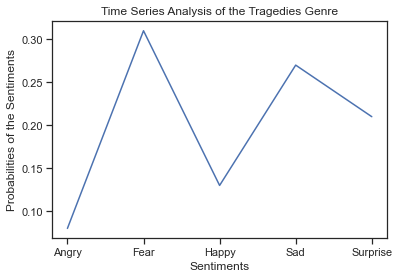

In [246]:
import matplotlib.pyplot as plt

plt.plot(*zip(*sorted(sentiments_tragedies.items())))
plt.xlabel("Sentiments")
plt.ylabel("Probabilities of the Sentiments")
plt.title("Time Series Analysis of the Tragedies Genre")
plt.show();

In [77]:
import numpy as np

re_index = np.arange(len(df_book_tragedies))
df_book_tragedies = df_book_tragedies.set_index(re_index)
df_book_tragedies.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
0,the tragedy of antony and cleopatra,tragedy antony cleopatra,3,0.688,0.312,0.0,-0.6597,negative
1,by william shakespeare,william shakespeare,2,0.000,1.000,0.0,0.0000,neutral
2,dramatis personae,dramatis personae,2,0.000,1.000,0.0,0.0000,neutral
3,"mark antony, triumvirs",mark antony triumvirs,3,0.000,1.000,0.0,0.0000,neutral
4,"octavius caesar, """,octavius caesar,2,0.000,1.000,0.0,0.0000,neutral


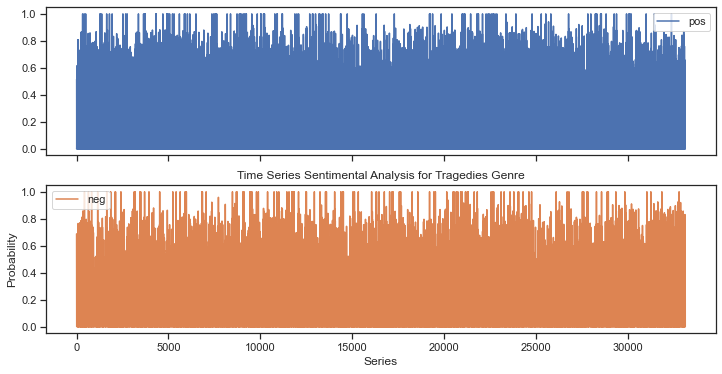

In [83]:
x_tragedies_timeseries = df_book_tragedies.loc[:,["pos", "neg"]]
x_tragedies_timeseries.plot(subplots=True, figsize=(12,6))
plt.title("Time Series Sentimental Analysis for Tragedies Genre")
plt.ylabel("Probability")
plt.xlabel("Series")
plt.show()

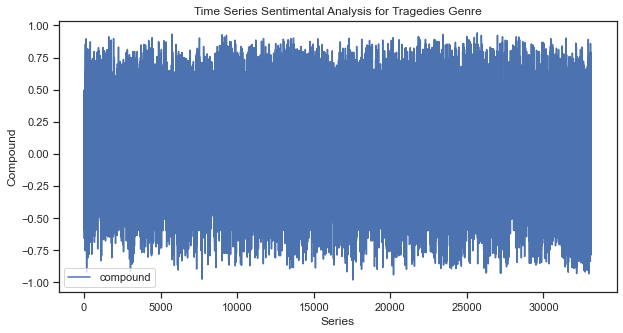

In [82]:
y_tragedies_timeseries = df_book_tragedies.loc[:,["compound"]]
y_tragedies_timeseries.plot(subplots=True, figsize=(10,5))
plt.title("Time Series Sentimental Analysis for Tragedies Genre")
plt.ylabel("Compound")
plt.xlabel("Series")
plt.show()

**Comedies Genre**

In [94]:
all_words_comedies = " ".join([token for token in df_book_comedies.tokens])
print("Total number of words in the Tragedies genre: ", len(all_words_comedies))

Total number of words in the Tragedies genre:  987836


In [96]:
sentiments_comedies = te.get_emotion(all_words_comedies)
sentiments_comedies

{'Happy': 0.15, 'Angry': 0.08, 'Surprise': 0.21, 'Sad': 0.26, 'Fear': 0.31}

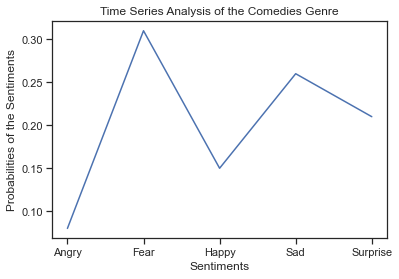

In [248]:
plt.plot(*zip(*sorted(sentiments_comedies.items())))
plt.xlabel("Sentiments")
plt.ylabel("Probabilities of the Sentiments")
plt.title("Time Series Analysis of the Comedies Genre")
plt.show();

In [84]:
import numpy as np

re_index = np.arange(len(df_book_comedies))
df_book_comedies = df_book_comedies.set_index(re_index)
df_book_comedies.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
0,alls well that ends well,alls well ends well,4,0.0,0.323,0.677,0.4939,positive
1,by william shakespeare,william shakespeare,2,0.0,1.000,0.000,0.0000,neutral
2,dramatis personae,dramatis personae,2,0.0,1.000,0.000,0.0000,neutral
3,king of france,king france,2,0.0,1.000,0.000,0.0000,neutral
4,the duke of florence,duke florence,2,0.0,1.000,0.000,0.0000,neutral


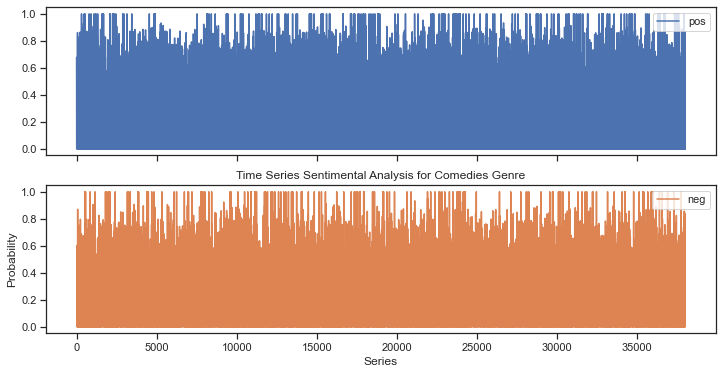

In [85]:
x_comedies_timeseries = df_book_comedies.loc[:,["pos", "neg"]]
x_comedies_timeseries.plot(subplots=True, figsize=(12,6))
plt.title("Time Series Sentimental Analysis for Comedies Genre")
plt.ylabel("Probability")
plt.xlabel("Series")
plt.show();

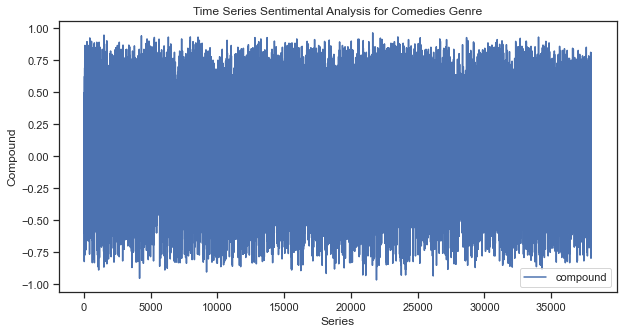

In [90]:
y_comedies_timeseries = df_book_comedies.loc[:,["compound"]]
y_comedies_timeseries.plot(subplots=True, figsize=(10,5))
plt.title("Time Series Sentimental Analysis for Comedies Genre")
plt.ylabel("Compound")
plt.xlabel("Series")
plt.show()

**Smothening the curve by reducing the noise**

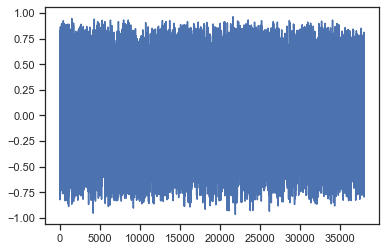

<Figure size 360x360 with 0 Axes>

In [102]:
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(y_comedies_timeseries, sigma=10)
plt.plot(ysmoothed)
plt.figure(figsize=(5, 5))
plt.show()

**Histories Genre**

In [249]:
all_words_histories = " ".join([token for token in df_book_histories.tokens])
print("Total number of words in the Tragedies genre: ", len(all_words_histories))

Total number of words in the Tragedies genre:  986965


In [250]:
sentiments_histories = te.get_emotion(all_words_histories)
sentiments_histories

{'Happy': 0.13, 'Angry': 0.08, 'Surprise': 0.2, 'Sad': 0.27, 'Fear': 0.32}

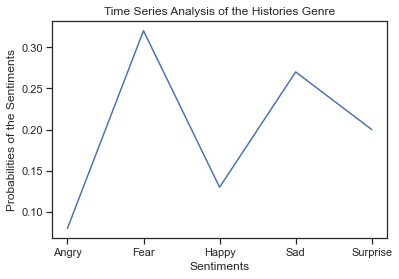

In [251]:
plt.plot(*zip(*sorted(sentiments_histories.items())))
plt.xlabel("Sentiments")
plt.ylabel("Probabilities of the Sentiments")
plt.title("Time Series Analysis of the Histories Genre")
plt.show();

In [86]:
import numpy as np

re_index = np.arange(len(df_book_histories))
df_book_histories = df_book_histories.set_index(re_index)
df_book_histories.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
0,the first part of king henry the fourth,first part king henry fourth,5,0.0,1.0,0.0,0.0,neutral
1,by william shakespeare,william shakespeare,2,0.0,1.0,0.0,0.0,neutral
2,dramatis personae,dramatis personae,2,0.0,1.0,0.0,0.0,neutral
3,king henry the fourth.,king henry fourth,3,0.0,1.0,0.0,0.0,neutral
4,"henry, prince of wales, son to the king.",henry prince wales son king,5,0.0,1.0,0.0,0.0,neutral


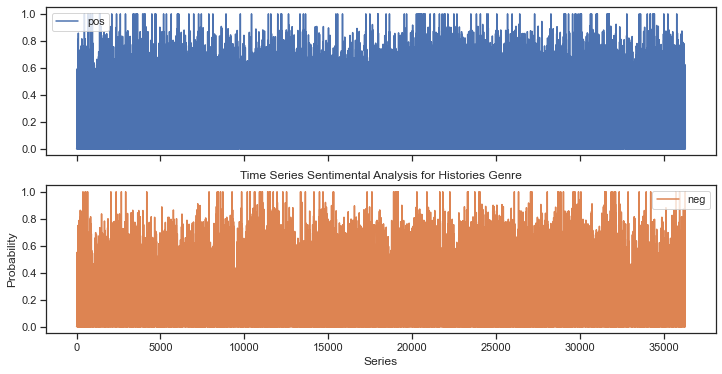

In [87]:
x_histories_timeseries = df_book_histories.loc[:,["pos", "neg"]]
x_histories_timeseries.plot(subplots=True, figsize=(12,6))
plt.title("Time Series Sentimental Analysis for Histories Genre")
plt.ylabel("Probability")
plt.xlabel("Series")
plt.show();

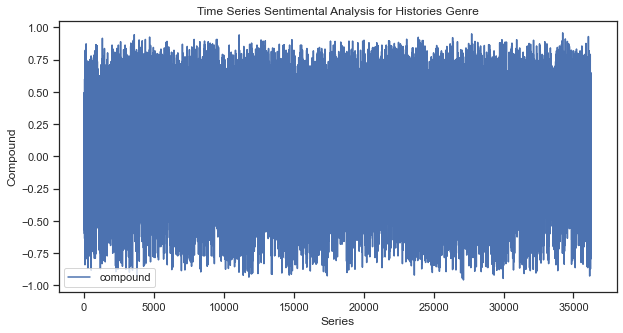

In [91]:
y_histories_timeseries = df_book_histories.loc[:,["compound"]]
y_histories_timeseries.plot(subplots=True, figsize=(10,5))
plt.title("Time Series Sentimental Analysis for Histories Genre")
plt.ylabel("Compound")
plt.xlabel("Series")
plt.show()

**Poems**

In [252]:
all_words_poem = " ".join([token for token in df_book_poem.tokens])
print("Total number of words in the Tragedies genre: ", len(all_words_poem))

Total number of words in the Tragedies genre:  68867


In [253]:
sentiments_poem = te.get_emotion(all_words_poem)
sentiments_poem

{'Happy': 0.19, 'Angry': 0.08, 'Surprise': 0.17, 'Sad': 0.29, 'Fear': 0.27}

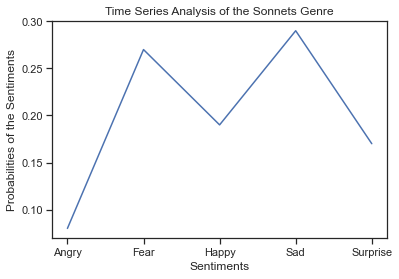

In [254]:
plt.plot(*zip(*sorted(sentiments_poem.items())))
plt.xlabel("Sentiments")
plt.ylabel("Probabilities of the Sentiments")
plt.title("Time Series Analysis of the Sonnets Genre")
plt.show();

In [88]:
import numpy as np

re_index = np.arange(len(df_book_poem))
df_book_poem = df_book_poem.set_index(re_index)
df_book_poem.head()

,lines,tokens,number_of_words,neg,neu,pos,compound,sentiment
0,the sonnets,sonnet,1,0.0,1.000,0.000,0.0000,neutral
1,by william shakespeare,william shakespeare,2,0.0,1.000,0.000,0.0000,neutral
2,"from fairest creatures we desire increase,",fairest creatures desire increase,4,0.0,0.286,0.714,0.6124,positive
3,"that thereby beauty's rose might never die,",thereby beauty rose might never die,6,0.0,0.365,0.635,0.7873,positive
4,"but as the riper should by time decease,",riper time decease,3,0.0,1.000,0.000,0.0000,neutral


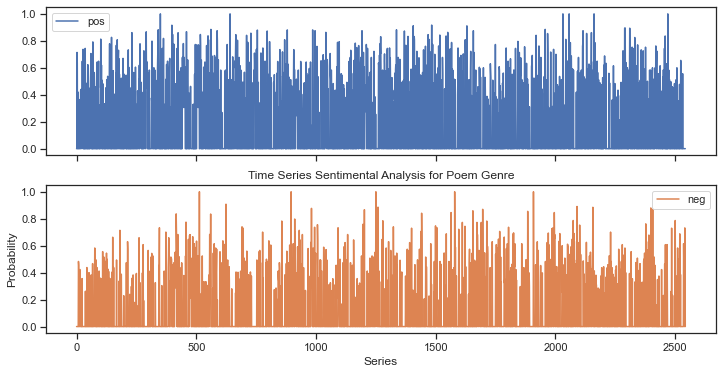

In [89]:
x_poem_timeseries = df_book_poem.loc[:,["pos", "neg",]]
x_poem_timeseries.plot(subplots=True, figsize=(12,6))
plt.title("Time Series Sentimental Analysis for Poem Genre")
plt.ylabel("Probability")
plt.xlabel("Series")
plt.show()

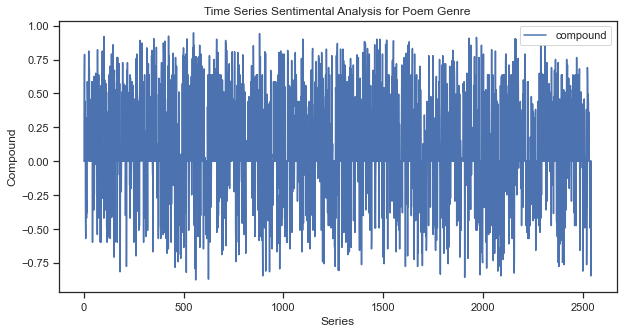

In [92]:
y_poem_timeseries = df_book_poem.loc[:,["compound"]]
y_poem_timeseries.plot(subplots=True, figsize=(10,5))
plt.title("Time Series Sentimental Analysis for Poem Genre")
plt.ylabel("Compound")
plt.xlabel("Series")
plt.show()

*After analysing the time series sentimental analysis for all the Shakesphere genre, it more evident that his words primarily resembles the fear and sad tone of voice.*

**Thank you!**